In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('data/customer_purchase_behaviors.csv')

In [11]:
data.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13


In [12]:
list_name_feature = ['age', 'annual_income', 'purchase_amount', 'purchase_frequency']
ouput_name_feature = ['loyalty_score']

In [13]:
X = data[list_name_feature]
y = data[ouput_name_feature]

X.shape, y.shape

((238, 4), (238, 1))

In [14]:
X.head()

,age,annual_income,purchase_amount,purchase_frequency
0,25,45000,200,12
1,34,55000,350,18
2,45,65000,500,22
3,22,30000,150,10
4,29,47000,220,13


In [15]:
y.head()

,loyalty_score
0,4.5
1,7.0
2,8.0
3,3.0
4,4.8


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((190, 4), (48, 4), (190, 1), (48, 1))

In [17]:
X_train.head()

,age,annual_income,purchase_amount,purchase_frequency
184,43,63000,470,21
224,52,72000,610,26
194,52,72000,610,26
95,41,61000,480,22
227,50,70000,600,25


In [18]:
y_train.head()

,loyalty_score
184,7.8
224,9.2
194,9.2
95,7.7
227,9.0


In [19]:
lr = LinearRegression()

In [20]:
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
lr.coef_

array([[ 6.11383955e-03,  3.58740152e-05,  1.25462302e-02,
        -7.24473205e-02]])

In [22]:
y_pred = lr.predict(X_test)
y_pred.shape

(48, 1)

In [23]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
intercept = lr.intercept_

r2, mse, mae, intercept

(0.9910179346546255,
 0.03712571415558017,
 0.13880480394559136,
 array([0.59774691]))

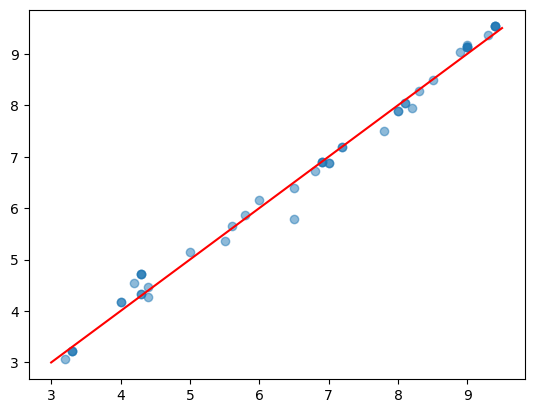

In [24]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color = 'red')

[ 5.97746914e-01  6.11383955e-03  3.58740152e-05  1.25462302e-02
 -7.24473205e-02]
MSE from sklearn: 0.03712571415558017
MSE from manual calculation: 0.0371


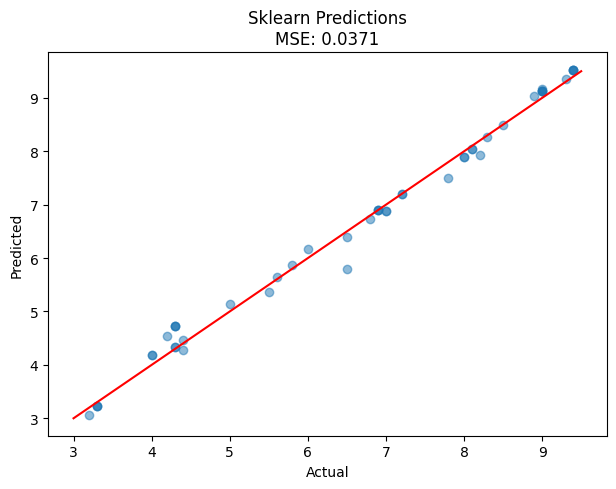

In [25]:
# Calculate MSE for the manual implementation
X_test_with_intercept = np.column_stack([np.ones(X_test.shape[0]), X_test])
w = np.concatenate([lr.intercept_, lr.coef_.flatten()])

print(w)

# Calculate manual predictions
y_pred_manual = X_test_with_intercept @ w

mse_manual = np.mean((y_test.values.flatten() - y_pred_manual) ** 2)

print(f"MSE from sklearn: {mse}")
print(f"MSE from manual calculation: {mse_manual:.4f}")

# Draw comparison chart
plt.figure(figsize=(12, 5))

# Chart 1: sklearn predictions
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Sklearn Predictions\nMSE: {mse:.4f}')

plt.tight_layout()
plt.show()